In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


In [29]:
# Load your dataset into a DataFrame
data = pd.read_csv('Execution_time_prediction_dataset.csv')

In [30]:
# Assuming you have features X and target variable y
X = data[['total_input_tokens', 'total_number_of_chunks', 'total_output_tokens','total_number_of_steps','lines_of_code','number_of_files']]  # Example features
y = data['total_duration']

In [31]:
data.head(10)

,lines_of_code,number_of_files,total_duration,total_input_tokens,total_number_of_chunks,total_number_of_steps,total_output_tokens
0,23,1,11.237,34267,1,61,11082
1,23,1,1.429,2451,1,6,1216
2,23,1,2.339,2589,1,6,1298
3,23,1,1.598,2397,1,6,1199
4,23,1,19.538,25710,1,61,7730
5,23,1,3.791,2515,1,8,2085
6,23,1,4.572,1257,1,8,1399
7,23,1,6.240,1750,1,10,1466
8,23,1,4.393,3019,1,10,2437
9,23,1,3.724,2237,1,10,2102


In [32]:
data.columns

Index(['lines_of_code', 'number_of_files', 'total_duration',
       'total_input_tokens', 'total_number_of_chunks', 'total_number_of_steps',
       'total_output_tokens'],
      dtype='object')

In [33]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Initialize Linear Regression model
model = LinearRegression()

In [35]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [36]:
# Make predictions on the test set
predictions = model.predict(X_test)
print(predictions)

[ 0.3078635   9.99516896  4.85655485  8.99315256  1.55182066  0.3078635
  4.5481133   4.10507242  0.85831451  1.48898699  0.3078635   1.83893241
  1.53209416  0.28140935 -0.24148033 13.49716826  0.97670282  0.859712
  1.07503377  1.61677992  0.3078635   0.859712    1.32516179  1.66048873]


In [37]:
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 5.1149507108362355


In [38]:
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 1.1458482867578195


In [39]:
r2 = r2_score(y_test, predictions)
print("R-squared Score:",r2*100)

R-squared Score: 76.58835527973409


In [44]:
# Sample prediction
sample_input = np.array([[23,1,1168, 2,706,5]])
estimated_execution_time = model.predict(sample_input)
print("Estimated Execution Time for Sample Input:", estimated_execution_time)


Estimated Execution Time for Sample Input: [7.14301007]


C:\Users\chinmaya.sharma\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<AxesSubplot:>

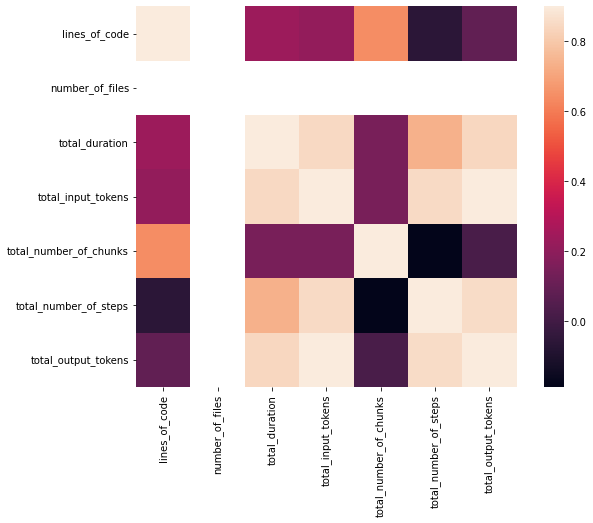

In [41]:
# Plot the Correlation map to see how features are correlated with target: SalePrice

import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = data.corr()
plt.subplots(figsize=(10,7))
sns.heatmap(corr_matrix, vmax=0.9, square=True)